# Exploratory Data Anaylysis

## Dataset Overview

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect
import kagglehub
import shutil

In [2]:
# Download dataset
path = kagglehub.dataset_download("fronkongames/steam-games-dataset")
target_path = "../data/raw/"
os.makedirs(target_path, exist_ok=True)

# Move and rename the csv file
for file in os.listdir(path):
    if file.endswith(".csv"):
        shutil.move(os.path.join(path, file), os.path.join(target_path, "games.csv"))
        break

file_path = os.path.join(target_path, "games.csv")

In [3]:
# Read games.csv
games = pd.read_csv(file_path, index_col=False, header=None, skiprows=1)
cols = [
    'app_id', 'name', 'release_date', 'estimated_owners', 'peak_ccu',
    'required_age', 'price', 'discount', 'dlc_count', 'about_the_game',
    'supported_languages', 'full_audio_languages', 'reviews',
    'header_image', 'website', 'support_url', 'support_email', 'windows',
    'mac', 'linux', 'metacritic_score', 'metacritic_url', 'user_score',
    'positive', 'negative', 'score_rank', 'achievements', 'recommendations',
    'notes', 'average_playtime_forever', 'average_playtime_two_weeks',
    'median_playtime_forever', 'median_playtime_two_weeks', 'developers',
    'publishers', 'categories', 'genres', 'tags', 'screenshots', 'movies'
]

games.columns = cols
games.head()

,app_id,name,release_date,estimated_owners,peak_ccu,required_age,price,discount,dlc_count,about_the_game,...,average_playtime_two_weeks,median_playtime_forever,median_playtime_two_weeks,developers,publishers,categories,genres,tags,screenshots,movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [4]:
games['release_date'] = pd.to_datetime(games['release_date'], format='mixed', errors='coerce')

In [5]:
# Inspect missing values
missing_values = games.isnull().sum()
missing_percentage = (games.isnull().sum() / len(games)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_df = missing_df[missing_df["Missing Values"] > 0]
missing_df

,Missing Values,Percentage
score_rank,97366,99.954830
metacritic_url,93457,95.941895
reviews,87285,89.605790
notes,81937,84.115594
website,54673,56.126681
support_url,51510,52.879581
tags,29763,30.554358
support_email,16035,16.461349
movies,7891,8.100811
categories,5913,6.070219


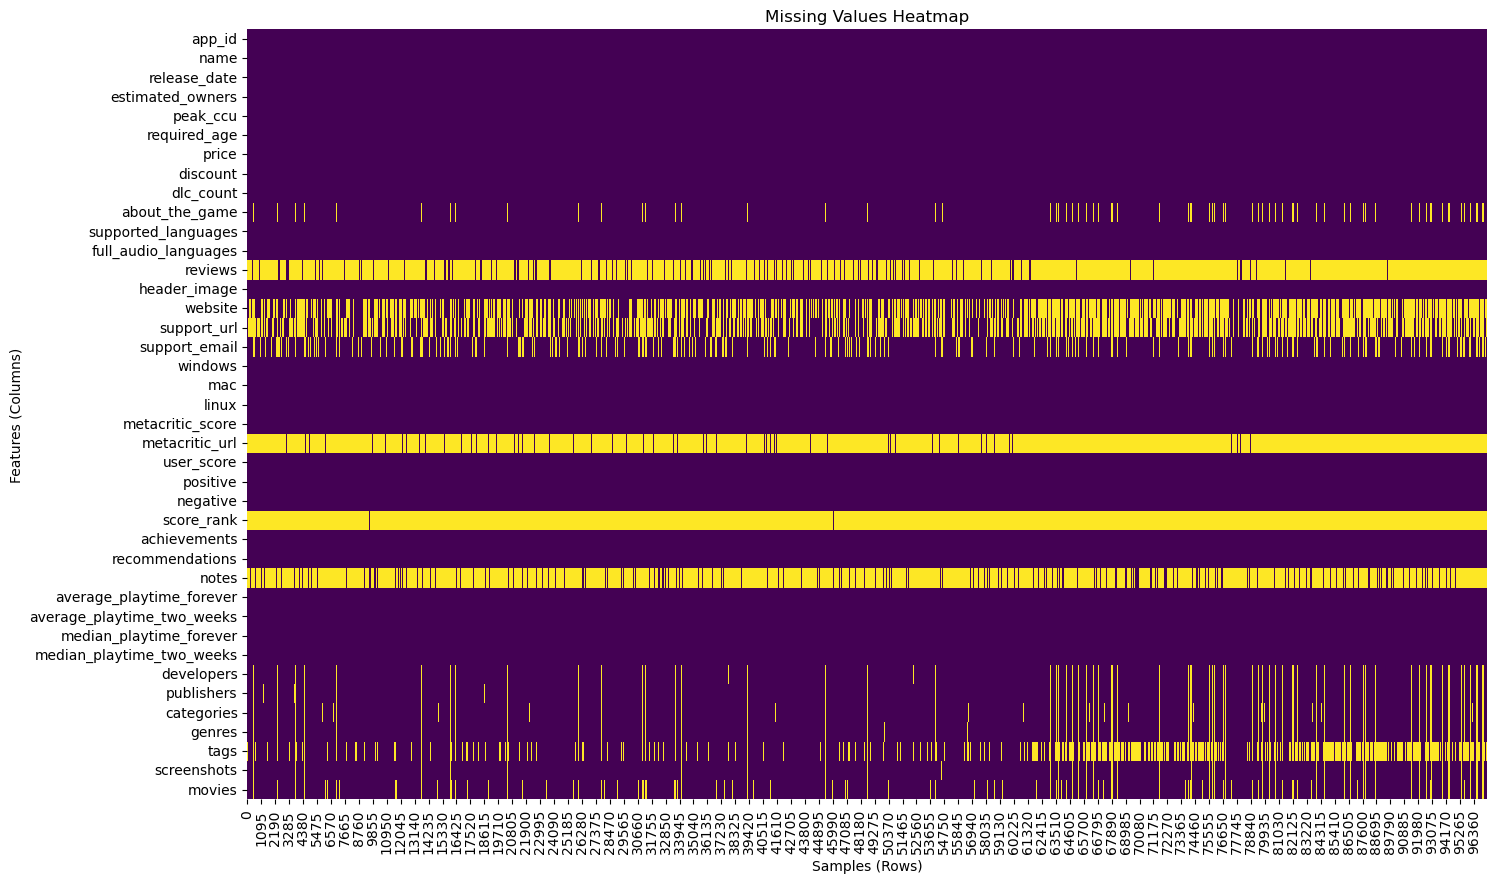

In [ ]:
# Visualize missingness in the data
plt.figure(figsize=(16, 10))
ax = plt.axes()
sns.heatmap(games.isna().transpose(), cbar=False, ax=ax, cmap='viridis')

plt.xlabel('Samples (Rows)', fontsize=14)
plt.ylabel('Features (Columns)', fontsize=14)
plt.title('Missing Values Heatmap', fontsize=16)

plt.show()

In [7]:
# Data cleaning
cols_to_drop = [
    'score_rank', 'metacritic_url', 'reviews', 'notes', 'header_image', 
    'website', 'support_url', 'discount', 'support_email', 'screenshots', 
    'movies', 'estimated_owners'
]

cleaned_games = games.drop(columns=cols_to_drop).dropna(subset=['name'])
cleaned_games[['estimated_owners_min', 'estimated_owners_max']] = (
    games['estimated_owners'].str.replace(',', '').str.split(' - ', expand=True).astype(int)
)


In [8]:
# Handle missingness
cleaned_games = cleaned_games[
    ~(cleaned_games['about_the_game'].isna()) &
    ~(cleaned_games['developers'].isna()) &
    ~(cleaned_games['publishers'].isna())
]

In [9]:
# Convert strings into lists for categories, genres and tags 
cols_to_list = ['categories', 'genres', 'tags']

for col in cols_to_list:
    cleaned_games[col] = cleaned_games[col].fillna('')
    cleaned_games[col] = cleaned_games[col].apply(lambda x: x.split(',') if isinstance(x, str) and '[' not in x else x)
cleaned_games.head()

,app_id,name,release_date,peak_ccu,required_age,price,dlc_count,about_the_game,supported_languages,full_audio_languages,...,average_playtime_two_weeks,median_playtime_forever,median_playtime_two_weeks,developers,publishers,categories,genres,tags,estimated_owners_min,estimated_owners_max
0,20200,Galactic Bowling,2008-10-21,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"[Single-player, Multi-player, Steam Achievemen...","[Casual, Indie, Sports]","[Indie, Casual, Sports, Bowling]",0,20000
1,655370,Train Bandit,2017-10-12,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,Rusty Moyher,Wild Rooster,"[Single-player, Steam Achievements, Full contr...","[Action, Indie]","[Indie, Action, Pixel Graphics, 2D, Retro, Arc...",0,20000
2,1732930,Jolt Project,2021-11-17,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],...,0,0,0,Campião Games,Campião Games,[Single-player],"[Action, Adventure, Indie, Strategy]",[],0,20000
3,1355720,Henosis™,2020-07-23,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,Odd Critter Games,Odd Critter Games,"[Single-player, Full controller support]","[Adventure, Casual, Indie]","[2D Platformer, Atmospheric, Surreal, Mystery,...",0,20000
4,1139950,Two Weeks in Painland,2020-02-03,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],...,0,0,0,Unusual Games,Unusual Games,"[Single-player, Steam Achievements]","[Adventure, Indie]","[Indie, Adventure, Nudity, Violent, Sexual Con...",0,20000


In [10]:
cleaned_games['about_char_counts'] = cleaned_games['about_the_game'].str.len()
cleaned_games[cleaned_games['about_char_counts'] < 50].head()

,app_id,name,release_date,peak_ccu,required_age,price,dlc_count,about_the_game,supported_languages,full_audio_languages,...,median_playtime_forever,median_playtime_two_weeks,developers,publishers,categories,genres,tags,estimated_owners_min,estimated_owners_max,about_char_counts
1330,353540,Stephen's Sausage Roll,2016-04-17,10,0,29.99,0,A simple 3d puzzle game.,['English'],['English'],...,71,0,increpare games,increpare games,"[Single-player, Full controller support, Capti...",[Indie],"[Puzzle, Indie, Difficult, Singleplayer, Sokob...",50000,100000,24
3083,1280500,Terracosmic,2020-05-27,0,0,0.99,0,Terracosmic is a game.,['English'],['English'],...,0,0,Jakub Klementewicz,Jakub Klementewicz,[Single-player],"[Action, Adventure, Simulation, Strategy]","[Strategy, Action, Adventure, Simulation, Surv...",0,20000,22
3615,698950,Chaos and the White Robot,2017-09-15,0,0,0.99,0,[no description],"['Russian', 'English', 'French', 'Italian', 'G...",[],...,0,0,SDF games,SDF games,"[Single-player, Partial Controller Support]","[Action, Casual, Indie]","[Action, Indie, Casual, Hand-drawn]",0,20000,16
3863,437900,Party Jousting,2016-03-01,1,0,0.00,2,YouTube: Chicharoney,"['English', 'Swedish', 'French', 'Italian', 'G...",[],...,67,0,vikingfabian.com,vikingfabian.com,"[Multi-player, PvP, Shared/Split Screen PvP, S...","[Casual, Indie, Sports]","[Free to Play, Casual, Indie, Sports, Multipla...",1000000,2000000,20
5562,1109130,逝去的回忆3：四叶草之梦,2019-08-16,1,0,9.99,6,There is only Chinese summary about this game.,['Simplified Chinese'],['Simplified Chinese'],...,0,0,神族宝,神族宝,"[Single-player, Steam Achievements, Steam Trad...","[Indie, RPG]","[Indie, RPG, RPGMaker, Adventure]",0,20000,46


In [11]:
cleaned_games_50_char = cleaned_games[cleaned_games['about_char_counts'] >= 50]

In [ ]:
# Detect language in about
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

cleaned_games_50_char.loc[:, 'about_lang'] = cleaned_games_50_char['about_the_game'].apply(detect_language)

C:\Users\aroce\AppData\Local\Temp\ipykernel_26780\3518309323.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_games_50_char['about_lang'] = cleaned_games_50_char['about_the_game'].apply(detect_language)


In [13]:
cleaned_games_50_char_en = cleaned_games_50_char[cleaned_games_50_char['about_lang'] == 'en']
cleaned_games_50_char_en.head()

,app_id,name,release_date,peak_ccu,required_age,price,dlc_count,about_the_game,supported_languages,full_audio_languages,...,median_playtime_two_weeks,developers,publishers,categories,genres,tags,estimated_owners_min,estimated_owners_max,about_char_counts,about_lang
0,20200,Galactic Bowling,2008-10-21,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],...,0,Perpetual FX Creative,Perpetual FX Creative,"[Single-player, Multi-player, Steam Achievemen...","[Casual, Indie, Sports]","[Indie, Casual, Sports, Bowling]",0,20000,1043,en
1,655370,Train Bandit,2017-10-12,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,Rusty Moyher,Wild Rooster,"[Single-player, Steam Achievements, Full contr...","[Action, Indie]","[Indie, Action, Pixel Graphics, 2D, Retro, Arc...",0,20000,491,en
2,1732930,Jolt Project,2021-11-17,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],...,0,Campião Games,Campião Games,[Single-player],"[Action, Adventure, Indie, Strategy]",[],0,20000,628,en
3,1355720,Henosis™,2020-07-23,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,Odd Critter Games,Odd Critter Games,"[Single-player, Full controller support]","[Adventure, Casual, Indie]","[2D Platformer, Atmospheric, Surreal, Mystery,...",0,20000,615,en
4,1139950,Two Weeks in Painland,2020-02-03,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],...,0,Unusual Games,Unusual Games,"[Single-player, Steam Achievements]","[Adventure, Indie]","[Indie, Adventure, Nudity, Violent, Sexual Con...",0,20000,672,en


In [17]:
cleaned_games_50_char_en.loc[:,'tagged_about'] = cleaned_games_50_char_en[
    ['app_id', 'about_the_game']
].astype(str).agg(' '.join, axis=1)

In [19]:
output_dir = "../data/processed"
os.makedirs(output_dir, exist_ok=True)
(
    cleaned_games_50_char_en
    .drop(['about_char_counts', 'about_lang'], axis=1)
    .to_csv(os.path.join(output_dir, 'games_cleaned.csv'))
)